# Koneoppiminen: Osa 4: Tukivektorikone

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Ville Karjalainen'
student_id = 'AA5075'

## Tehtävä 1
### Aihe: Pulsariaineisto

3 pistettä

Pulsareita käsittelevä aineisto osoitteesta https://archive.ics.uci.edu/ml/datasets/HTRU2 . Tavoitteena on luokitella aineiston datapisteet joko pulsariksi tai muunlaiseksi kohteeksi. Aineistossa on luokkamuuttuja viimeisessä sarakkeessa. 

1. Lataa aineisto DataFrameen. 
2. Nimeä DataFramen sarakkeet aineiston mukaisesti. Sarakkeiden nimet näet esimerkiksi `.arff`-tiedoston otsakkeesta.  
3. Normalisoi sarakkeiden arvot. 

In [18]:
# Kirjoita toteutuksesi tähän soluun. 

import pandas as pd
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
from sklearn import preprocessing


# Datan lataaminen repositorion kansioon ja dataframen luominen kansion sisällä olevasta csv-tiedostosta

zipurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip'
foldername = 'pulsar_data'
filepath = r'C:\Users\ville\Projects\repos\koneoppiminen-tehtavat\osa_4\pulsar_data\HTRU_2.csv'

with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(foldername)
        
                
# Sarakkeiden nimeäminen.

columns = [
'Mean of the integrated profile',
'Standard deviation of the integrated profile',
'Excess kurtosis of the integrated profile',
'Skewness of the integrated profile',
'Mean of the DM-SNR curve',
'Standard deviation of the DM-SNR curve.',
'Excess kurtosis of the DM-SNR curve',
'Skewness of the DM-SNR curve',
'Class'
]

data = pd.read_csv(open(filepath), sep=',', names=columns)


# Sarakkeiden normalisointi, ilman luokka-saraketta

x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=columns)
df_scaled.drop(['Class'], axis=1, inplace=True)

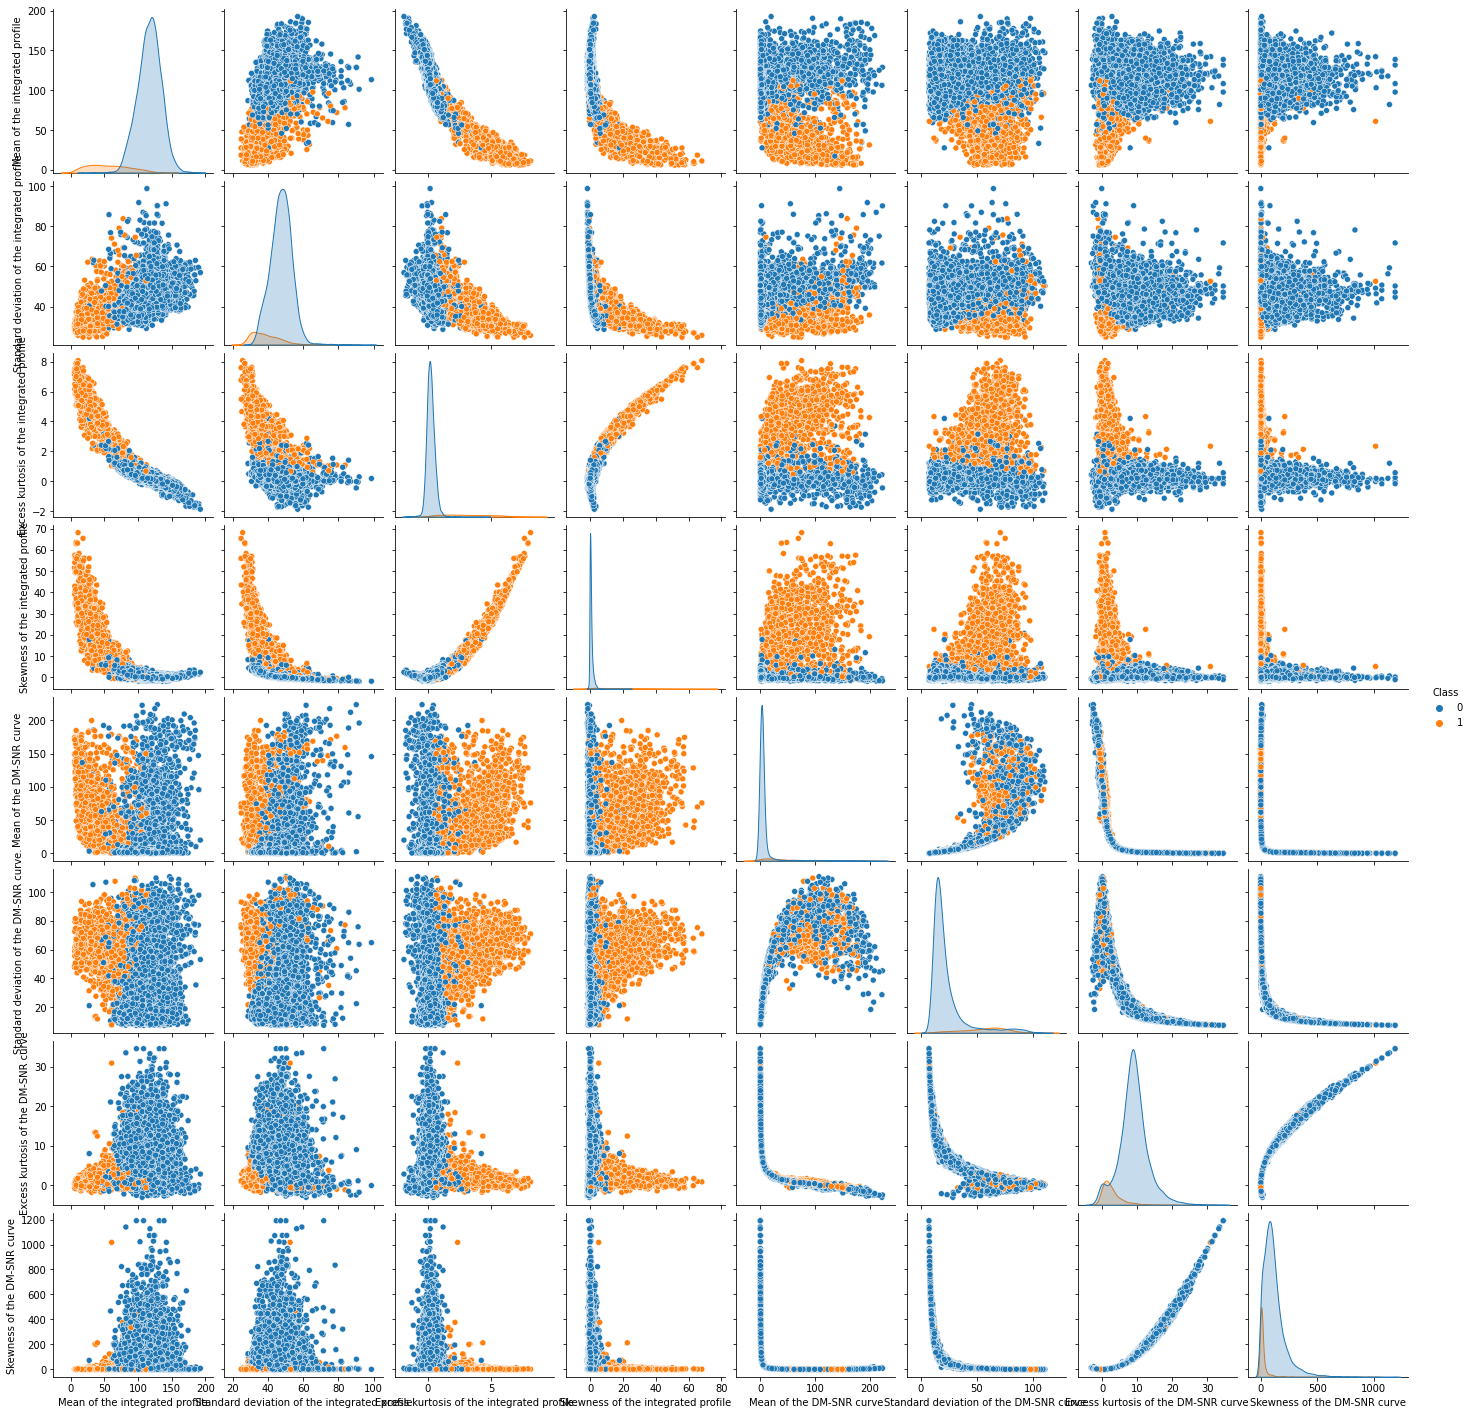

In [178]:
# visualisoin datan jotta siitä syntyy jonkilainen käsitys

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.pairplot(data, hue='Class')

In [153]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# DataFramen tulisi olla df-muuttujassa. 
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve.',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve'],
      dtype='object')
First row by position: Mean of the integrated profile                  0.721342
Standard deviation of the integrated profile    0.417687
Excess kurtosis of the integrated profile       0.165043
Skewness of the integrated profile              0.015627
Mean of the DM-SNR curve                        0.013382
Standard deviation of the DM-SNR curve.         0.113681
Excess kurtosis of the DM-SNR curve             0.294986
Skewness of the DM-SNR curve                    0.063890
Name: 0, dtype: float64


## Tehtävä 2
### Aihe: Koulutus- ja testausaineisto

3 pistettä

Jaa aineisto koulutus- ja testausaineistoon käyttäen `scikit-learn`-kirjaston [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)-funktiota. Laita puolet aineistosta kumpaankin. 

1. Tallenna koulutusaineisto ja sen luokkamuuttuja muuttujiin `X_train`, `y_train`,
2. ja toisaalta testausaineiston `X_test`, `y_test`. 

Käytä satunnaissiemenenä lukua `1492` ja testiaieiston kokoe 33%.

In [155]:
# Kirjoita toteutuksesi tähän soluun. 
import numpy as np
from sklearn.model_selection import train_test_split

df_scaled = np.array(df_scaled)

X, y = df_scaled, data['Class']


# Tallenna koulutusaineisto ja sen luokkamuuttuja muuttujiin X_train, y_train, ja toisaalta testausaineiston X_test, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1492) # Käytä satunnaissiemenenä lukua 1492 ja testiaieiston kokoe 33%.


In [177]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
print(f'X_train: {len(X_train)}')
print(f'X_test: {len(X_test)}')
print(f'y_train: {len(y_train)}')
print(f'y_test: {len(y_test)}')

X_train: 11991
X_test: 5907
y_train: 11991
y_test: 5907


## Tehtävä 3
### Aihe: Tukivektorikone

4 pistettä

1. Käytä `scikit-learn`-kirjaston *Linear Support Vector Classification* -funktiota kouluttaaksesi koulutusaineistollasi luokittelija, joka erottelee pulsarit muista kohteista. 

2. Luo ennusteet testausaineistosi datapisteille `y_pred`-muuttujaan. 

3. Tee `metrics`-moduulilla [luokitteluraportti](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) testausaineistosi ennusteille. Tallenna raportti `cr`-muuttujaan. Kannattaa myös tulostaa se, jotta näet itse tulokset. 

4. Tee `metrics`-moduulilla sekaannusmatriisi ja tallenna se `cm`-muuttujaan. 

In [175]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Käytä scikit-learn-kirjaston Linear Support Vector Classification -funktiota kouluttaaksesi koulutusaineistollasi luokittelija, joka erottelee pulsarit muista kohteista.
clf = LinearSVC()
clf.fit(X_train,y_train)


# Luodaan ennusteet testausaineistosi datapisteille y_pred-muuttujaan.
y_pred = clf.predict(X_test)


# Tee metrics-moduulilla luokitteluraportti aineiston ennusteille
cr = classification_report(y_test, y_pred)


# Tee metrics-moduulilla sekaannusmatriisi ja tallenna se cm-muuttujaan.
cm = confusion_matrix(y_test, y_pred)

In [176]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tulokset ovat cm- ja cr-muuttujissa. 
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5367
           1       0.96      0.76      0.85       540

    accuracy                           0.97      5907
   macro avg       0.97      0.88      0.92      5907
weighted avg       0.97      0.97      0.97      5907

Confusion matrix:
 [[5348   19]
 [ 131  409]]
